In [8]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
def OLS_GD(X, y, eta = 1e-3, n_iter = 1e4, add_intercept = True): ##X is a n-array and y is 
  
  ## Add Intercept
  if add_intercept:
    ones = np.ones(X.shape[0]).reshape(-1, 1)
    X = np.concatenate((ones, X), 1)
    
  ## Instantiate
  beta_hat = np.random.randn(X.shape[1])
  
  ## Iterate
  for i in range(int(n_iter)):
    
    ## Calculate Derivative
    yhat = X @ beta_hat
    delta = -X.T @ (y - yhat)
    beta_hat -= delta*eta

    
    

In [22]:
X= np.array([np.arange(10)])
y= (X-5)**2
a = OLS_GD(X,y)


ValueError: operands could not be broadcast together with shapes (11,) (11,10) (11,) 

In [13]:
ones = np.ones(1.shape[0]).reshape(-1, 1)

SyntaxError: invalid decimal literal (3717470159.py, line 1)

In [34]:
## Import packages 

## Import data
housing = fetch_california_housing()
X = housing ['data']
y = housing['target']
N = X.shape[0]

## Choose alphas to consider
potential_alphas = [0, 1, 10]
error_by_alpha = np.zeros(len(potential_alphas))

## Choose the folds 
K = 5
indices = np.arange(N)
np.random.shuffle(indices)
folds = np.array_split(indices, K)

## Iterate through folds
for k in range(K):
  
  ## Split Train and Validation
    X_train = np.delete(X, folds[k], 0)
    y_train = np.delete(y, folds[k], 0)
    X_val = X[folds[k]]
    y_val = y[folds[k]]
  
  ## Iterate through Alphas
    for i in range(len(potential_alphas)):
    
        ## Train on Training Set
        model = Ridge(alpha = potential_alphas[i])
        model.fit(X_train, y_train)

        ## Calculate and Append Error
        error = np.sum( (y_val - model.predict(X_val))**2 )
        error_by_alpha[i] += error
    
error_by_alpha /= N

print(error_by_alpha)

[0.52778428 0.52777443 0.52769361]


In [14]:
housing = fetch_california_housing()
# print(housing)
df = pd.DataFrame(data=housing.data,columns=housing.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


[-8.84629342 -8.75801333 -8.66973324 -8.58145314 -8.49317305 -8.40489295
 -8.31661286 -8.22833277 -8.14005267 -8.05177258 -7.96349248 -7.87521239
 -7.78693229 -7.6986522  -7.61037211 -7.52209201 -7.43381192 -7.34553182
 -7.25725173 -7.16897164 -7.08069154 -6.99241145 -6.90413135 -6.81585126
 -6.72757116 -6.63929107 -6.55101098 -6.46273088 -6.37445079 -6.28617069
 -6.1978906  -6.10961051 -6.02133041 -5.93305032 -5.84477022 -5.75649013
 -5.66821003 -5.57992994 -5.49164985 -5.40336975 -5.31508966 -5.22680956
 -5.13852947 -5.05024937 -4.96196928 -4.87368919 -4.78540909 -4.697129
 -4.6088489  -4.52056881 -4.43228872 -4.34400862 -4.25572853 -4.16744843
 -4.07916834 -3.99088824 -3.90260815 -3.81432806 -3.72604796 -3.63776787
 -3.54948777 -3.46120768 -3.37292759 -3.28464749 -3.1963674  -3.1080873
 -3.01980721 -2.93152711 -2.84324702 -2.75496693 -2.66668683 -2.57840674
 -2.49012664 -2.40184655 -2.31356646 -2.22528636 -2.13700627 -2.04872617
 -1.96044608 -1.87216598 -1.78388589 -1.6956058  -1.60

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

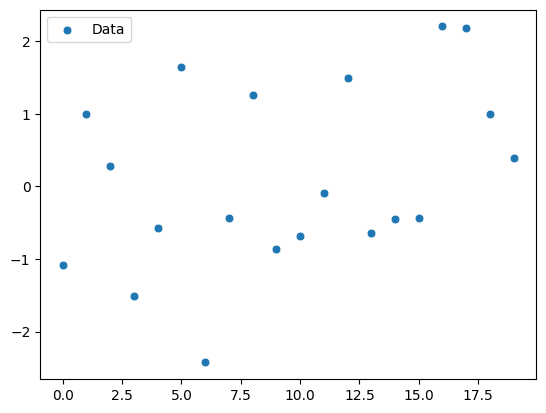

In [17]:
# generate data
np.random.seed(123)
N = 20
beta0 = -4
beta1 = 2
x = np.random.randn(N)
e = np.random.randn(N)
y = beta0 + beta1*x + e
true_x = np.linspace(min(x), max(x), 100)
true_y = beta0 + beta1*true_x

# estimate model 
beta1_hat = sum((x - np.mean(x))*(y - np.mean(y)))/sum((x - np.mean(x))**2)
beta0_hat = np.mean(y) - beta1_hat*np.mean(x)
fit_y = beta0_hat + beta1_hat*true_x

print(fit_y)
# plot
fig, ax = plt.subplots()
sns.scatterplot(x, s = 40, label = 'Data')
sns.lineplot(true_x, true_y, color = 'red', label = 'True Model')
sns.lineplot(true_x, fit_y, color = 'purple', label = 'Estimated Model')
ax.set_xlabel('x', fontsize = 14)
ax.set_title(fr"Linear Regression for $y = {beta0} + ${beta1}$x + \epsilon$", fontsize = 16)
ax.set_ylabel('y', fontsize=14, rotation=0, labelpad=10)
ax.legend(loc = 4)
sns.despine()

In [9]:
class LinearRegression:

    def fit(self, X, y, intercept = False):

        # record data and dimensions
        if intercept == False: # add intercept (if not already included)
            ones = np.ones(len(X)).reshape(len(X), 1) # column of ones 
            X = np.concatenate((ones, X), axis = 1)   #append  one 
        self.X = np.array(X)
        self.y = np.array(y)
        self.N, self.D = self.X.shape
        XtX = np.dot(self.X.T, self.X) #Estimate Parameters
        XtX_inverse = np.linalg.inv(XtX)
        Xty = np.dot(self.X.T, self.y)
        self.beta_hats = np.dot(XtX_inverse, Xty)
        self.y_hat = np.dot(self.X, self.beta_hats) # make in-sample predictions
        self.L = .5*np.sum((self.y - self.y_hat)**2)   # calculate loss
        
    def predict(self, X_test, intercept = True):
        # form predictions
        self.y_test_hat = np.dot(X_test, self.beta_hats)
housing = fetch_california_housing()  ##Loading Calfornia Housing Dataset
X = housing ['data']
y  = housing['target']
model = LinearRegression() #Instantiating
model.fit(X, y, intercept= False)   #Fitting the Regression Model
fig, ax = plt.subplots()
plt.scatter(model.y,model.y_hat , s=50, c='red', marker='s')
plt.xlabel('Y')
plt.ylabel('Y pre')
plt.title('Scatter Plot')
plt.grid(True)
plt.show()

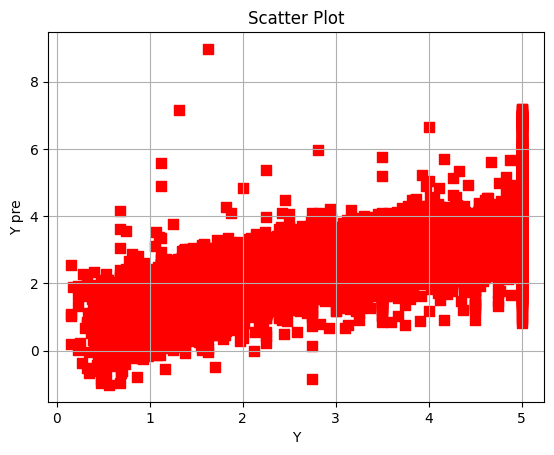

In [26]:
housing = fetch_california_housing()
X = housing ['data']
y  = housing['target']
model = LinearRegression()
model.fit(X, y, intercept= False)

fig, ax = plt.subplots()
plt.scatter(model.y,model.y_hat , s=50, c='red', marker='s')
plt.xlabel('Y')
plt.ylabel('Y pre')
plt.title('Scatter Plot')
plt.grid(True)
plt.show()